<a href="https://colab.research.google.com/github/fernanda0402/Python/blob/master/circular_source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip analytic-sl-solutions-main.zip

In [ ]:
import sys
sys.path.append("analytic-sl-solutions-main/src/circular_source")

In [ ]:
import Arcs
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
r0 = 0.1
s =  0.3 # 0.01
theta_e = 1
phi_0 = 0

In [ ]:
x_out = []    # Posição das imagens fora do raio de Einstein
y_out = []

x_in = []   # Posição das imagens dentro do raio de Einstein
y_in = []

x_source = []   # Posição da fonte
y_source = []

x_e = []  # Posição do anel de Einstein
y_e = []

if(s<r0):

	phi = 0

	while(phi <= 2*np.pi):

		beta = Arcs.betaplus(phi, phi_0, r0, s)
		theta1 = Arcs.thetaplus_plus(phi, phi_0, r0, s, theta_e)
		theta2 = Arcs.thetaminus_plus(phi, phi_0, r0, s, theta_e)

		x_source.append(beta*np.cos(phi))
		y_source.append(beta*np.sin(phi))
		x_out.append(theta1*np.cos(phi))
		y_out.append(theta1*np.sin(phi))
		x_in.append(theta2*np.cos(phi))
		y_in.append(theta2*np.sin(phi))

		phi = phi + 0.001

#__________________________________________________________________________________
else:

	phi = phi_0 - np.arcsin(r0/s) #asin(r0/s)

	#loop para theta1 com beta+
	while(phi <= phi_0 + np.arcsin(r0/s)):

		beta_ext = Arcs.betaplus(phi, phi_0, r0, s) 
		theta1_ext =  Arcs.thetaplus_plus(phi, phi_0, r0, s, theta_e)

		#adcionamos os valores as listas criadas
		x_source.append(beta_ext*np.cos(phi))
		y_source.append(beta_ext*np.sin(phi))
		x_out.append(theta1_ext*np.cos(phi))
		y_out.append(theta1_ext*np.sin(phi))

		phi = phi + 0.001 #somamos angulos

	#o angulo agora eh maximo. inserimos a condicao para rodar ate o angulo minimo
#______________________________________________________________________________________________
	#loop para theta1 com beta-
	while(phi >= phi_0 - np.arcsin(r0/s)):

		beta_int = Arcs.betaminus(phi, phi_0, r0, s) #beta-
		theta1_int = Arcs.thetaplus_minus(phi, phi_0, r0, s, theta_e)

		x_source.append(beta_int*np.cos(phi))
		y_source.append(beta_int*np.sin(phi))
		x_out.append(theta1_int*np.cos(phi))
		y_out.append(theta1_int*np.sin(phi))

		phi = phi - 0.001 #subtraimos angulos

	phi = phi_0 - np.arcsin(r0/s) + np.pi
#______________________________________________________________________________________________________
	#loop para theta2 com beta+
	while(phi <= phi_0 + np.arcsin(r0/s) + np.pi):

		beta_ext = s*np.cos(phi - phi_0) + np.sqrt((r0**2 - (s**2)*(np.sin(phi - phi_0))**2)) #beta+  #Arcs.betaplus(phi, phi_0, r0, s)    #beta+
		beta_ext2 = beta_ext**2
		theta2_ext = (beta_ext/2 + np.sqrt(beta_ext2/4 + theta_e**2))  #Arcs.thetaplus_plus(phi, phi_0, r0, s, theta_e)            

		x_in.append(theta2_ext*np.cos(phi))
		y_in.append(theta2_ext*np.sin(phi))	

		phi = phi + 0.001
#_______________________________________________________________________________________________________

	#loop para theta2 com beta- 
	while(phi >= phi_0 - np.arcsin(r0/s) + np.pi):

		beta_int = Arcs.betaminus(phi, phi_0, r0, s) #beta-
		theta2_int = Arcs.thetaplus_minus(phi, phi_0, r0, s, theta_e)


		x_in.append(theta2_int*np.cos(phi))
		y_in.append(theta2_int*np.sin(phi))

		phi = phi - 0.001
#_______________________________________________________________________________________________________

i = 0
while(i<=2*np.pi):
	x_e.append(theta_e*np.cos(i))
	y_e.append(theta_e*np.sin(i))
	i+=0.01

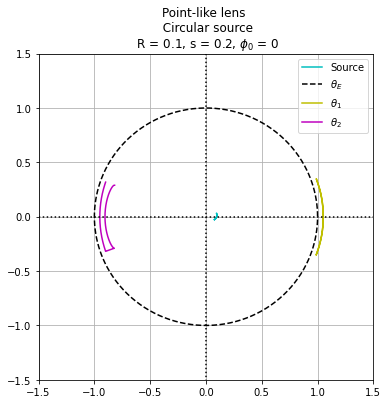

In [ ]:
# plotamos os graficos
plt.figure(figsize=(6,6))    
plt.plot(x_source, y_source,"c")  # círculo da fonte
plt.plot(x_e, y_e, "k--") # círculo de Einstein?
plt.plot(x_out, y_out, "y") #Imagem de fora
plt.plot(x_in, y_in, "m") # Imagem de dentro

plt.plot([-3, 3],[0, 0], "k:")
plt.plot([0,0],[-3, 3], "k:")
plt.axis([-1.5, 1.5, -1.5, 1.5])

plt.title("Point-like lens \n  Circular source \n R = 0.1, s = 0.2, $\phi_0$ = 0")
plt.legend(["Source", r'$\theta_E$', r'$\theta_1$',r'$\theta_2$'])
#plt.savefig("grafico1.png")
plt.grid(True)
plt.show()  

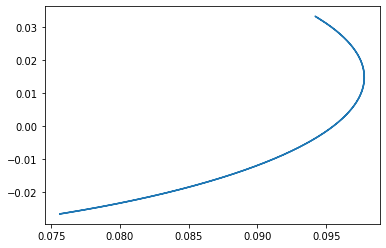

In [ ]:
plt.plot(x_source, y_source)

Estão aparecendo alguns erros na formação do gráfico, como o caso da fonte parecer uma vírgula e a linha horizontal em $\theta_2$. 